In [1]:

import os

# Change the current working directory to a different directory
os.chdir("/home/adham.ibrahim/speech_datasets/train")


In [2]:
import os
import pandas as pd

# Specify the directory path
directory_path = '/home/adham.ibrahim/speech_datasets/train'

# Initialize an empty dictionary to store the DataFrames
data_dict = {}

# Iterate through subdirectories
for folder_name in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder_name)
    
    # Check if the item in the directory is a subdirectory
    if os.path.isdir(folder_path):
        
        # Construct the expected CSV file path (assuming the CSV file has the same name as the folder)
        csv_file_path = os.path.join(folder_path, f'{folder_name}.csv')
      
        # Check if the CSV file with the same name as the folder exists
        if os.path.exists(csv_file_path):
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_file_path)
            
            # Store the DataFrame in the dictionary with the folder name as the key
            data_dict[folder_name] = df

# Now, data_dict contains DataFrames for each subdirectory where the keys are the subdirectory names


In [3]:
data_dict.keys()

dict_keys(['Emotion_Speech_Dataset', 'emov_db', 'MELD.Raw', 'savee', 'CREMA-D', 'ravdess', 'IEMOCAP_full_release', 'JL_corpus'])

In [4]:
# Iterate through the data_dict and make the "Emotion" column values lowercase
for folder_name, df in data_dict.items():
    if "Emotion" in df.columns:
        df["Emotion"] = df["Emotion"].str.lower()

# Iterate through the data_dict and make the "Emotion" column values lowercase
for folder_name, df in data_dict.items():
    if "Gender" in df.columns:
        df["Gender"] = df["Gender"].str.lower()



In [5]:
# Define a mapping of values to be replaced
emotion_mapping = {
    'neutral': 'neu',
    'angry': 'ang',
    'happy': 'hap',
    'surprised': 'sur',
    'surprise': 'sur',
    'disgust': 'dis',
    'disgusted': 'dis',
    'fear': 'fea',
    'fearful': 'fea',
    'excited' : 'exc'
}

# Iterate through the data_dict and apply the mapping to the "Emotion" column
for folder_name, df in data_dict.items():
    if "Emotion" in df.columns:
        df["Emotion"] = df["Emotion"].replace(emotion_mapping)


In [22]:
# import librosa
# import soundfile

# dataset = ['Emotion_Speech_Dataset', 'emov_db', 'MELD.Raw', 'savee', 'CREMA-D', 'ravdess', 'IEMOCAP_full_release', 'JL_corpus']
# def change_sample_rate(file_path, target_sample_rate=16000):
#     try:
#         # Load audio file
#         audio, sr = librosa.load(file_path, sr=None)

#         # Check if the sample rate needs to be changed
#         if sr != target_sample_rate:
#             # Resample the audio
#             audio_resampled = librosa.resample(y = audio, orig_sr = sr, target_sr= target_sample_rate)

#             # Save the resampled audio
#             soundfile.write(file_path, audio_resampled, target_sample_rate)

#             print(f"Sample rate changed to {target_sample_rate} Hz for file: {file_path}")
#         else:
#             print(f"Sample rate is already {target_sample_rate} Hz for file: {file_path}")

#     except Exception as e:
#         print(f"Error processing {file_path}: {e}")

# # Assuming data_dict is your dictionary and dataset is a list of indices
# # For example: dataset = [1, 2, 3, ...]
# for i in range(len(dataset)):
#     file_paths = data_dict[dataset[i]]['File_Path']

#     for file_path in file_paths:
#         change_sample_rate(file_path)


Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000928.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000914.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000900.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000733.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000727.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000848.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000860.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_000874.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_001029.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_Dataset/0020/Happy/0020_001001.wav
Sample rate is already 16000 Hz for file: ./Emotion_Speech_D

In [6]:
data_dict['Emotion_Speech_Dataset']

,File_Path,Emotion,Gender,Duration
0,./Emotion_Speech_Dataset/0020/Happy/0020_00092...,hap,male,3.850
1,./Emotion_Speech_Dataset/0020/Happy/0020_00091...,hap,male,3.088
2,./Emotion_Speech_Dataset/0020/Happy/0020_00090...,hap,male,3.834
3,./Emotion_Speech_Dataset/0020/Happy/0020_00073...,hap,male,3.534
4,./Emotion_Speech_Dataset/0020/Happy/0020_00072...,hap,male,3.312
...,...,...,...,...
17495,./Emotion_Speech_Dataset/0014/Angry/0014_00049...,ang,male,2.420
17496,./Emotion_Speech_Dataset/0014/Angry/0014_00044...,ang,male,2.239
17497,./Emotion_Speech_Dataset/0014/Angry/0014_00045...,ang,male,3.786
17498,./Emotion_Speech_Dataset/0014/Angry/0014_00053...,ang,male,3.137


In [7]:
# from pydub import AudioSegment
# import pandas as pd

# # Assuming df is your DataFrame with a column named "File_Path"
# # For example:
# # df = pd.read_csv('your_dataframe.csv')

# def get_wav_sample_rate(file_path):
#     audio = AudioSegment.from_file(file_path)
#     sample_rate = audio.frame_rate
#     return sample_rate

# # Apply the function to each row in the "File_Path" column
# data_dict[dataset[0]]['Sample_Rate'] =  data_dict[dataset[0]]['File_Path'].apply(get_wav_sample_rate)

# # Print the result
# #print(df[['File_Path', 'Sample_Rate']])


NameError: name 'dataset' is not defined

In [62]:
print(data_dict[dataset[0]][['File_Path', 'Sample_Rate']])

                                               File_Path  Sample_Rate
0      ./Emotion_Speech_Dataset/0020/Happy/0020_00092...        16000
1      ./Emotion_Speech_Dataset/0020/Happy/0020_00091...        16000
2      ./Emotion_Speech_Dataset/0020/Happy/0020_00090...        16000
3      ./Emotion_Speech_Dataset/0020/Happy/0020_00073...        16000
4      ./Emotion_Speech_Dataset/0020/Happy/0020_00072...        16000
...                                                  ...          ...
17495  ./Emotion_Speech_Dataset/0014/Angry/0014_00049...        16000
17496  ./Emotion_Speech_Dataset/0014/Angry/0014_00044...        16000
17497  ./Emotion_Speech_Dataset/0014/Angry/0014_00045...        16000
17498  ./Emotion_Speech_Dataset/0014/Angry/0014_00053...        16000
17499  ./Emotion_Speech_Dataset/0014/Angry/0014_00052...        16000

[17500 rows x 2 columns]


In [8]:
# Combine all DataFrames from the dictionary into one large DataFrame
combined_df = pd.concat(data_dict.values(), ignore_index=True)


In [9]:
combined_df['Emotion'].value_counts()

neu            14747
ang             9233
hap             8157
sad             7341
sur             5487
dis             2896
xxx             2507
fea             1913
fru             1849
sleepy          1721
amused          1317
exc             1281
apologetic       240
assertive        240
anxious          240
concerned        240
encouraging      240
calm             184
oth                3
Name: Emotion, dtype: int64

In [10]:
combined_df

,File_Path,Emotion,Gender,Duration
0,./Emotion_Speech_Dataset/0020/Happy/0020_00092...,hap,male,3.850
1,./Emotion_Speech_Dataset/0020/Happy/0020_00091...,hap,male,3.088
2,./Emotion_Speech_Dataset/0020/Happy/0020_00090...,hap,male,3.834
3,./Emotion_Speech_Dataset/0020/Happy/0020_00073...,hap,male,3.534
4,./Emotion_Speech_Dataset/0020/Happy/0020_00072...,hap,male,3.312
...,...,...,...,...
59831,./JL_corpus/Raw_JL_corpus/wav_txt/male1_anxiou...,anxious,male,1.850
59832,./JL_corpus/Raw_JL_corpus/wav_txt/female2_anxi...,anxious,female,2.300
59833,./JL_corpus/Raw_JL_corpus/wav_txt/male1_excite...,exc,male,2.400
59834,./JL_corpus/Raw_JL_corpus/wav_txt/female1_enco...,encouraging,female,2.000


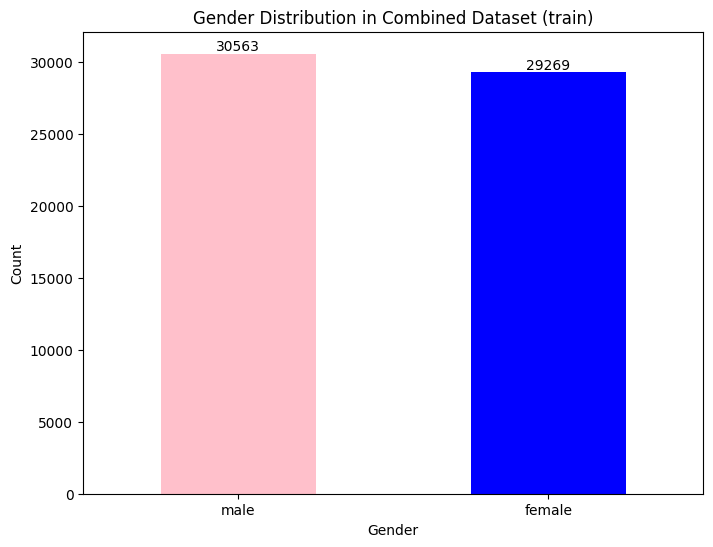

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already imported your data into combined_df
# If not, make sure to load your data first

# Group the data by 'Gender' and count the occurrences
gender_counts = combined_df['Gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = gender_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title('Gender Distribution in Combined Dataset (train)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: rotate x-axis labels

# Add numbers to the legend
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


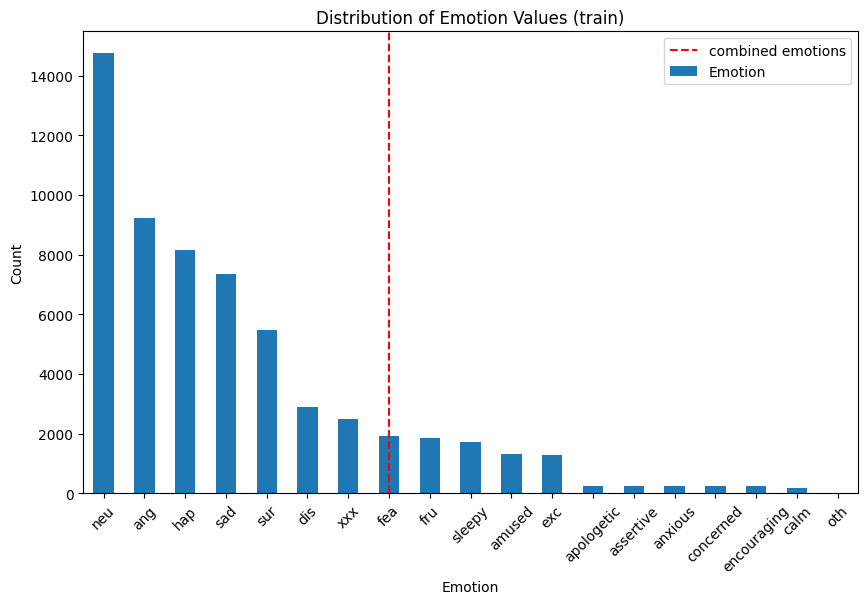

In [12]:
import matplotlib.pyplot as plt

# Count the frequency of each unique emotion value in the "Emotion" column
emotion_counts = combined_df['Emotion'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Distribution of Emotion Values (train)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add a vertical red line at "fru" on the x-axis
plt.axvline(x=emotion_counts.index.get_loc('fea'), color='red', linestyle='--', label='combined emotions')

# Show the legend
plt.legend()

plt.show()


In [13]:
import pandas as pd

# List of emotions to keep
emotions_to_plot = ['neu', 'hap', 'ang', 'sad', 'sur', 'dis', 'fea']
# Filter the DataFrame to keep only specified emotions
filtered_df = combined_df[combined_df['Emotion'].isin(emotions_to_plot)]
# Display the result
print(filtered_df)


                                               File_Path Emotion  Gender  \
0      ./Emotion_Speech_Dataset/0020/Happy/0020_00092...     hap    male   
1      ./Emotion_Speech_Dataset/0020/Happy/0020_00091...     hap    male   
2      ./Emotion_Speech_Dataset/0020/Happy/0020_00090...     hap    male   
3      ./Emotion_Speech_Dataset/0020/Happy/0020_00073...     hap    male   
4      ./Emotion_Speech_Dataset/0020/Happy/0020_00072...     hap    male   
...                                                  ...     ...     ...   
59820  ./JL_corpus/Raw_JL_corpus/wav_txt/female2_neut...     neu  female   
59823  ./JL_corpus/Raw_JL_corpus/wav_txt/female1_happ...     hap  female   
59825  ./JL_corpus/Raw_JL_corpus/wav_txt/male1_sad_15...     sad    male   
59829  ./JL_corpus/Raw_JL_corpus/wav_txt/male1_sad_13...     sad    male   
59835  ./JL_corpus/Raw_JL_corpus/wav_txt/male2_neutra...     neu    male   

       Duration  
0         3.850  
1         3.088  
2         3.834  
3         3.534

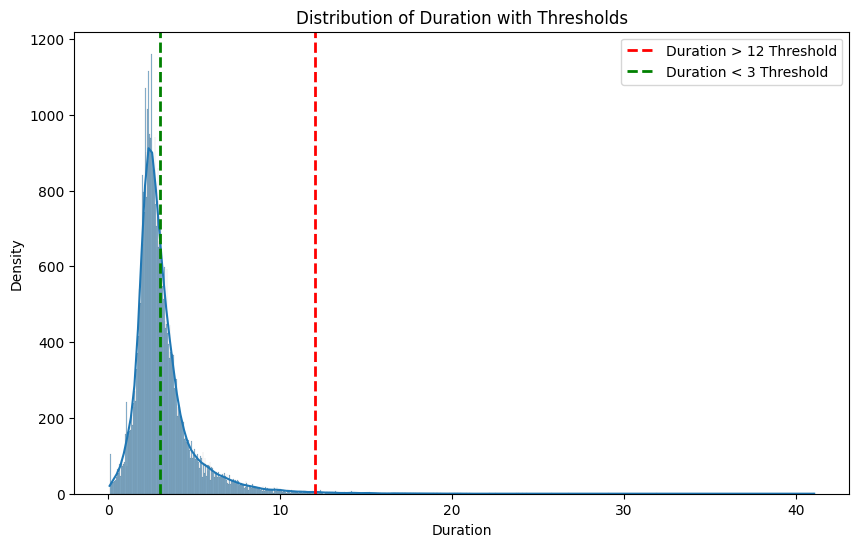

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram with a density curve
sns.histplot(filtered_df['Duration'], kde=True, ax=ax, bins=1000)

# Highlight durations above 15 and below 1
plt.axvline(12, color='red', linestyle='--', linewidth=2, label='Duration > 12 Threshold')
plt.axvline(3, color='green', linestyle='--', linewidth=2, label='Duration < 3 Threshold')

# Add labels and legend
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Distribution of Duration with Thresholds')

# Show the plot
plt.legend()
plt.show()

In [15]:
min = 3
max = 12
filtered_df = filtered_df[(filtered_df['Duration'] > min) & (filtered_df['Duration'] < max)]

# Display the resulting DataFrame
print()
# Sum the Duration column in seconds
total_duration_seconds = filtered_df['Duration'].sum()

# Convert total duration to hours
total_duration_hours = total_duration_seconds / 3600  # 1 hour = 3600 seconds

# Display the total duration in hours
print(f'Total Duration (hours): {total_duration_hours} , threshold: {min , max}')



Total Duration (hours): 24.175930833333336 , threshold: (3, 12)


In [16]:
print(filtered_df['Emotion'].value_counts())

neu    5559
ang    4072
sad    3144
hap    2548
dis    1817
sur    1774
fea     581
Name: Emotion, dtype: int64


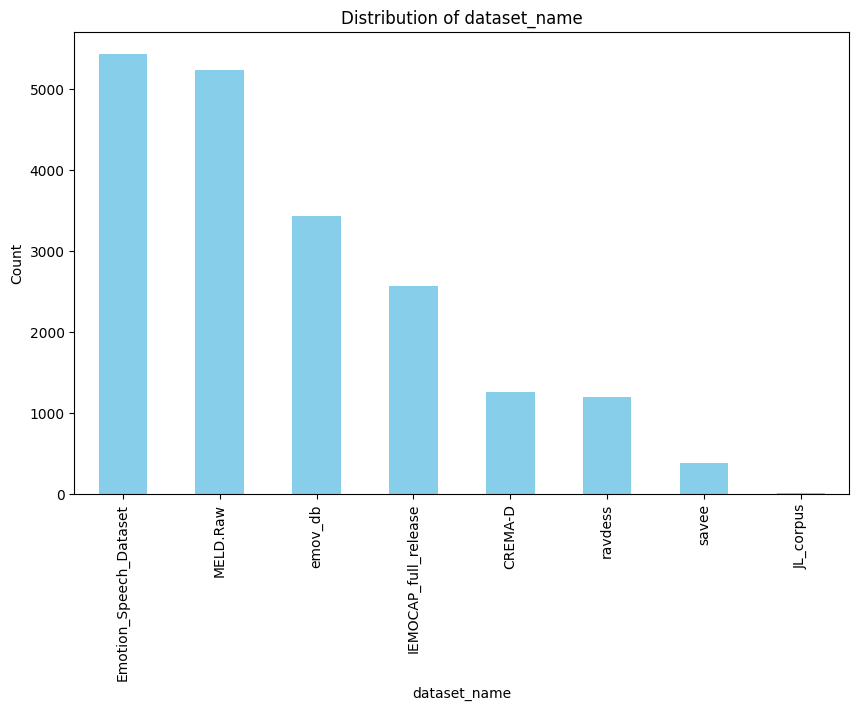

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming filtered_df is your DataFrame
# For example, if your DataFrame looks like this:
# filtered_df = pd.DataFrame({'File_Path': ['./savee/data/JK_sa01.wav', './savee/data/AB_sa02.wav', './savee/data/CD_sa03.wav']})

# Extract the first part of the paths and save them in a new column
filtered_df['dataset_name'] = filtered_df['File_Path'].str.split('/').str[1]

# Plot the dataset_name values
plt.figure(figsize=(10, 6))
filtered_df['dataset_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of dataset_name')
plt.xlabel('dataset_name')
plt.ylabel('Count')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


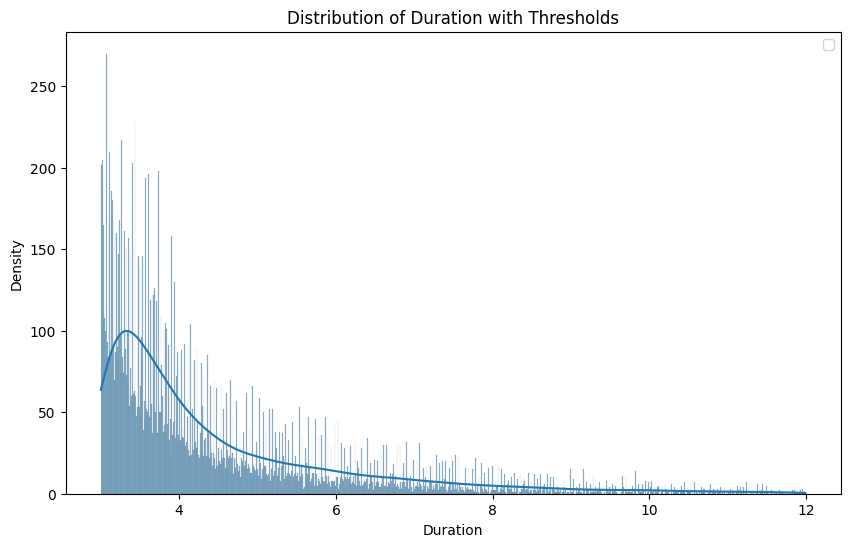

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram with a density curve
sns.histplot(filtered_df['Duration'], kde=True, ax=ax, bins=1000)


# Add labels and legend
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Distribution of Duration with Thresholds')

# Show the plot
plt.legend()
plt.show()

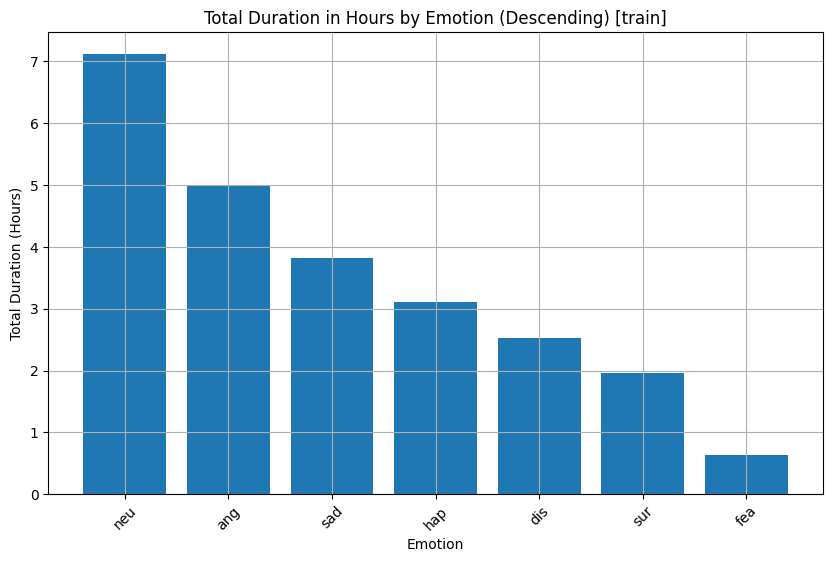

In [19]:
import matplotlib.pyplot as plt

# Group the data by "Emotion" and calculate the total duration in hours for each group
emotion_duration_hours = filtered_df.groupby('Emotion')['Duration'].sum() / 3600

# Convert the result to a DataFrame for better visualization
emotion_duration_hours_df = emotion_duration_hours.reset_index()

# Rename the columns for clarity
emotion_duration_hours_df.columns = ['Emotion', 'Total Duration (Hours)']

# Sort the DataFrame in descending order by total duration
emotion_duration_hours_df = emotion_duration_hours_df.sort_values(by='Total Duration (Hours)', ascending=False)

# Create a descending bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotion_duration_hours_df['Emotion'], emotion_duration_hours_df['Total Duration (Hours)'])
plt.title('Total Duration in Hours by Emotion (Descending) [train]')
plt.xlabel('Emotion')
plt.ylabel('Total Duration (Hours)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [20]:
filtered_df

,File_Path,Emotion,Gender,Duration,dataset_name
0,./Emotion_Speech_Dataset/0020/Happy/0020_00092...,hap,male,3.850,Emotion_Speech_Dataset
1,./Emotion_Speech_Dataset/0020/Happy/0020_00091...,hap,male,3.088,Emotion_Speech_Dataset
2,./Emotion_Speech_Dataset/0020/Happy/0020_00090...,hap,male,3.834,Emotion_Speech_Dataset
3,./Emotion_Speech_Dataset/0020/Happy/0020_00073...,hap,male,3.534,Emotion_Speech_Dataset
4,./Emotion_Speech_Dataset/0020/Happy/0020_00072...,hap,male,3.312,Emotion_Speech_Dataset
...,...,...,...,...,...
57430,./IEMOCAP_full_release/Sessions/Session5/sente...,sad,female,5.720,IEMOCAP_full_release
57435,./IEMOCAP_full_release/Sessions/Session5/sente...,neu,female,11.370,IEMOCAP_full_release
57971,./JL_corpus/Raw_JL_corpus/wav_txt/female2_sad_...,sad,female,3.750,JL_corpus
58857,./JL_corpus/Raw_JL_corpus/wav_txt/female2_sad_...,sad,female,3.400,JL_corpus


In [21]:
# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('/home/adham.ibrahim/speech_datasets/train/train_df.csv', index=False)


In [22]:
import pandas as pd

# Specify the file path
file_path = '/home/adham.ibrahim/speech_datasets/train/train_df.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())


                                           File_Path Emotion Gender  Duration  \
0  ./Emotion_Speech_Dataset/0020/Happy/0020_00092...     hap   male     3.850   
1  ./Emotion_Speech_Dataset/0020/Happy/0020_00091...     hap   male     3.088   
2  ./Emotion_Speech_Dataset/0020/Happy/0020_00090...     hap   male     3.834   
3  ./Emotion_Speech_Dataset/0020/Happy/0020_00073...     hap   male     3.534   
4  ./Emotion_Speech_Dataset/0020/Happy/0020_00072...     hap   male     3.312   

             dataset_name  
0  Emotion_Speech_Dataset  
1  Emotion_Speech_Dataset  
2  Emotion_Speech_Dataset  
3  Emotion_Speech_Dataset  
4  Emotion_Speech_Dataset  


In [23]:
# Assuming df is your DataFrame
emov_db_rows = df[df['dataset_name'] == 'emov_db']

# Display the filtered DataFrame
print(emov_db_rows)


                                              File_Path Emotion Gender  \
5438        ./emov_db/sam/sam_Angry/anger_1-28_0011.wav     ang   male   
5439      ./emov_db/sam/sam_Angry/anger_85-112_0111.wav     ang   male   
5440      ./emov_db/sam/sam_Angry/anger_85-112_0105.wav     ang   male   
5441       ./emov_db/sam/sam_Angry/anger_29-56_0047.wav     ang   male   
5442       ./emov_db/sam/sam_Angry/anger_29-56_0053.wav     ang   male   
...                                                 ...     ...    ...   
8862  ./emov_db/josh/josh_Neutral/neutral_169-196_01...     neu   male   
8863  ./emov_db/josh/josh_Neutral/neutral_169-196_01...     neu   male   
8864  ./emov_db/josh/josh_Neutral/neutral_141-168_01...     neu   male   
8865  ./emov_db/josh/josh_Neutral/neutral_141-168_01...     neu   male   
8866  ./emov_db/josh/josh_Neutral/neutral_29-56_0032...     neu   male   

      Duration dataset_name  
5438     4.310      emov_db  
5439     4.881      emov_db  
5440     4.829      e